**Import Libraries**

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load Dataset**

In [145]:
df = pd.read_csv('/content/drive/MyDrive/Projects/CODSOFT/IMDb.csv', encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


**Check Null values**

In [146]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

**Data PreProcessing**

In [147]:
df.drop('Name', inplace=True, axis=1)
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [148]:
df.dropna(inplace=True)
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [149]:
df['Duration'] = df['Duration'].str.replace('min', '').apply(pd.to_numeric)
df["Votes"] = pd.to_numeric(df['Votes'].str.replace(',', ''))
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,(2019),110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,(1997),147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,(2005),142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,(2012),82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


**ploting Functions**

In [150]:
def bar(x,y,xl,yl,chart_name):
  plt.figure(figsize=(16,7))
  plt.bar(x,y)
  plt.xlabel(xl)
  plt.ylabel(yl)
  plt.title(chart_name)
  plt.xticks(rotation=90)
  plt.show()

def pltData(data,count):
  global df
  name = df[data].value_counts().sort_values(ascending=False).head(count)

  return name

Drama                      844
Drama, Romance             332
Action, Crime, Drama       329
Action, Drama              206
Comedy, Drama              205
Comedy, Drama, Romance     188
Comedy                     187
Action                     170
Drama, Family              160
Romance                    126
Action, Comedy, Drama      118
Comedy, Romance            107
Action, Drama, Romance     107
Drama, Musical, Romance     93
Thriller                    84
Name: Genre, dtype: int64


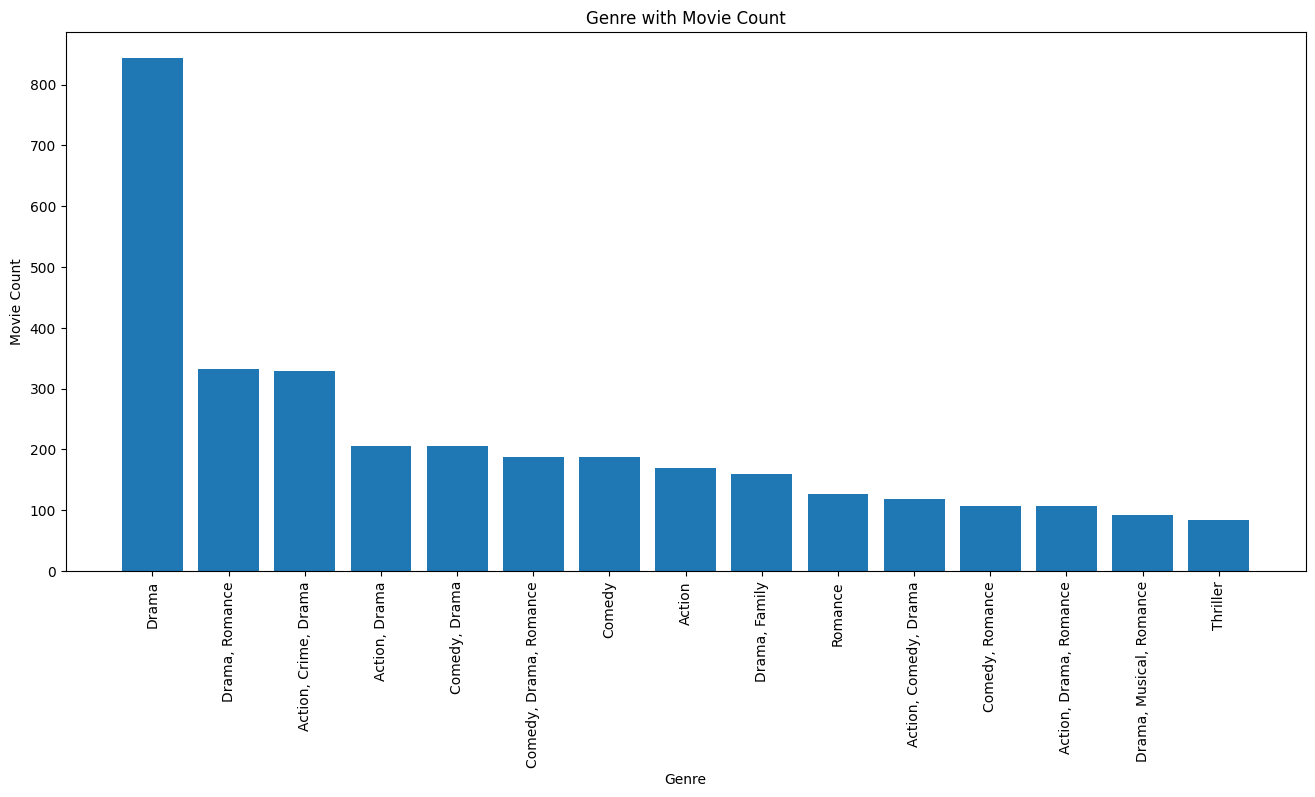

In [151]:
genre10 = pltData('Genre',15)
print(genre10)
bar(genre10.index, genre10.values , "Genre", "Movie Count", "Genre with Movie Count")

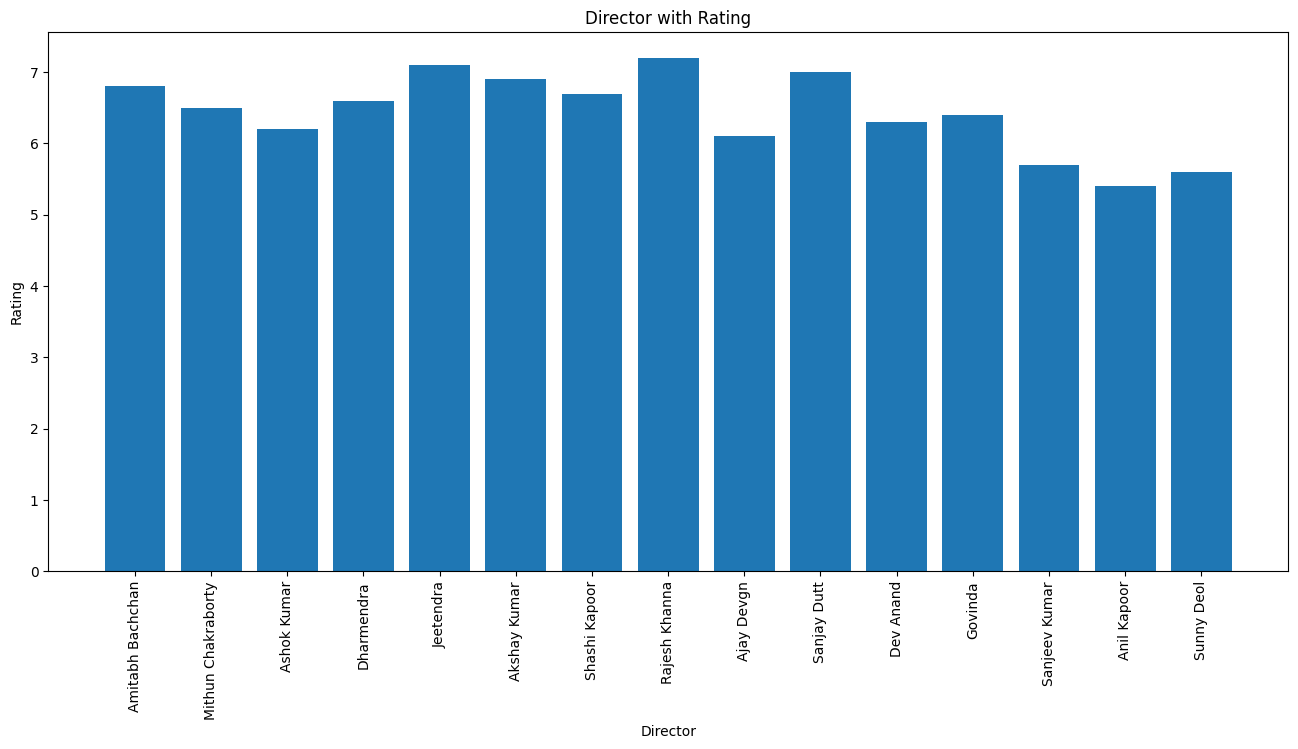

In [152]:
rating10 = pltData('Rating',15)
actor10 = pltData('Actor 1',15)

bar(actor10.index, rating10.index, "Director", "Rating", "Director with Rating")

Actor 1
A. Muthu              3.300000
A. Nairang            6.100000
A.K. Hangal           6.200000
A.S. Ravindra Babu    4.800000
Aachi Manorama        4.800000
                        ...   
Zarina Wahab          2.600000
Zayed Khan            4.575000
Zeenat Aman           6.045455
Zenia Starr           7.400000
Zulfi Sayed           5.200000
Name: Rating, Length: 1960, dtype: float64


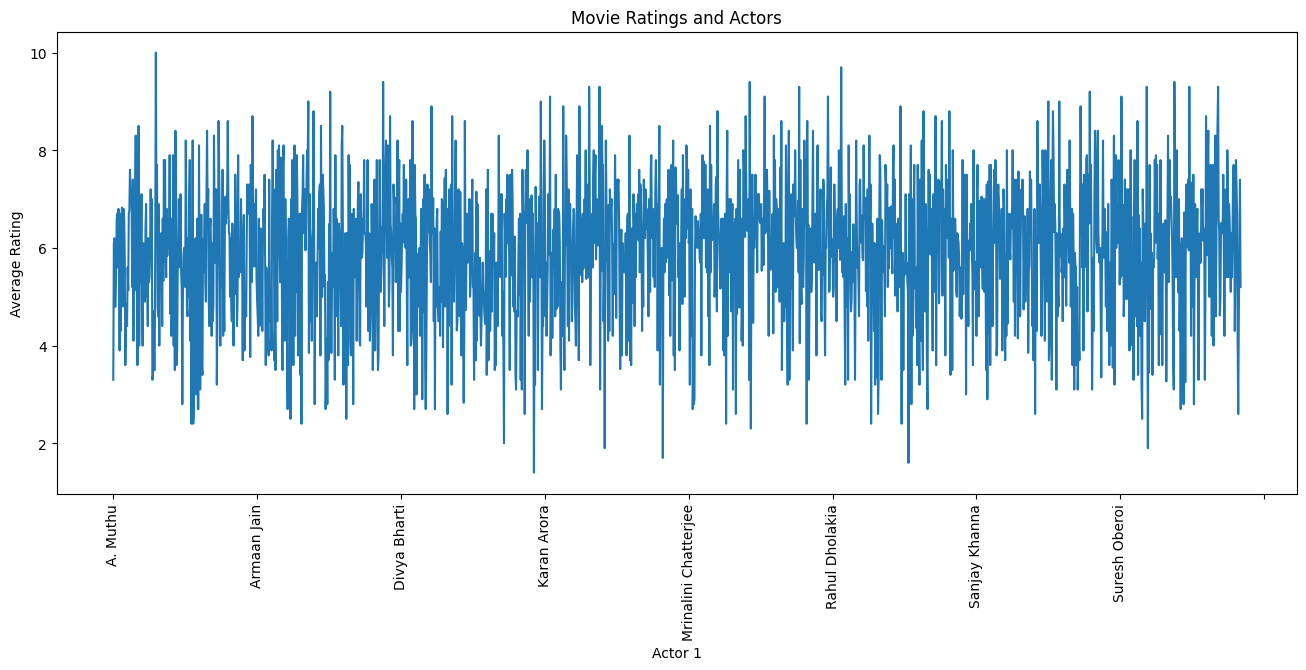

In [153]:
# Actor 1 & Rating

ratings_by_actor = df.groupby('Actor 1')['Rating'].mean()
print(ratings_by_actor)

plt.figure(figsize=(16, 6))
ratings_by_actor.plot()
plt.title('Movie Ratings and Actors')
plt.xlabel('Actor 1')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

Actor 2
A.H. Shore        6.20
A.K. Hangal       7.65
Aachi Manorama    6.10
Aadil Khan        3.80
Aahana Kumra      5.90
                  ... 
Zoa Morani        5.20
Zoya Afroz        5.00
Zoya Hussain      7.30
Zubeida           6.20
Zuber K. Khan     6.00
Name: Rating, Length: 2321, dtype: float64


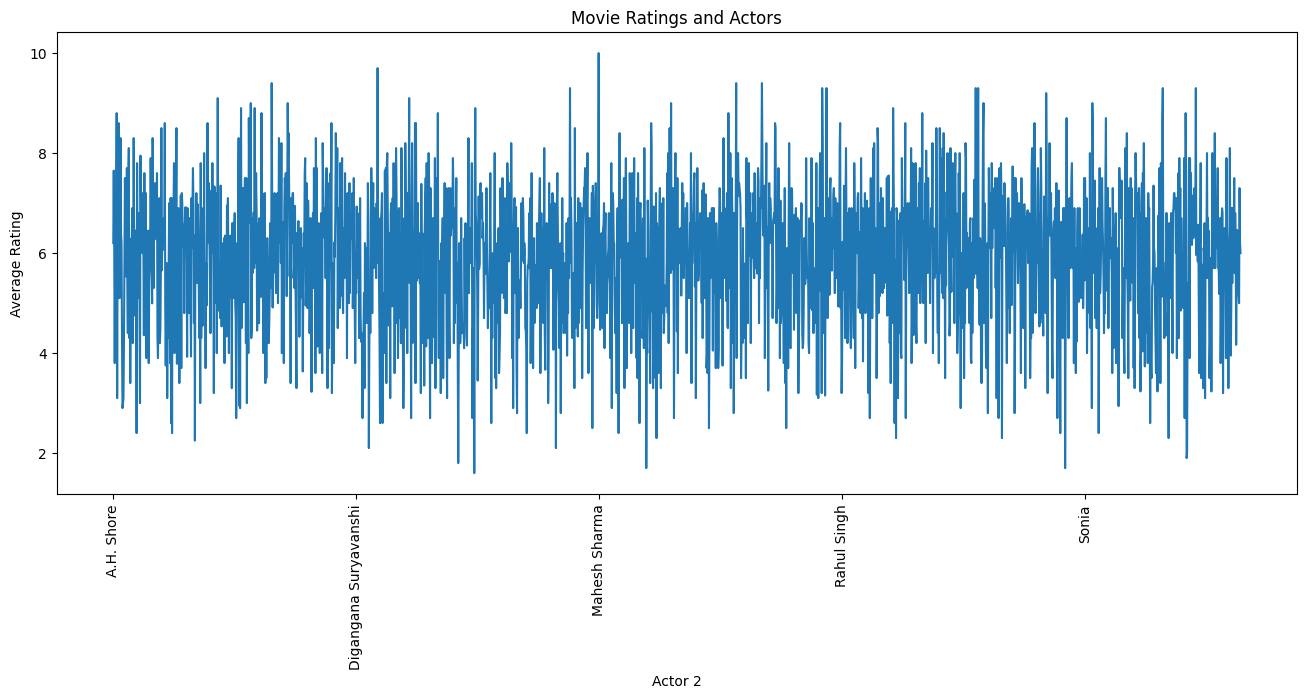

In [154]:
# Actor 2 & Rating

ratings_by_actor = df.groupby('Actor 2')['Rating'].mean()
print(ratings_by_actor)

plt.figure(figsize=(16, 6))
ratings_by_actor.plot()
plt.title('Movie Ratings and Actors')
plt.xlabel('Actor 2')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

Actor 3
A.K. Hangal       6.575000
Aachi Manorama    6.333333
Aadi              8.600000
Aaditya Singh     5.800000
Aahana Kumra      5.600000
                    ...   
Zeeshan Khan      6.200000
Zeishan Quadri    3.800000
Zenobia Shroff    5.700000
Zoya Hussain      7.700000
Zulfi Sayed       3.300000
Name: Rating, Length: 2556, dtype: float64


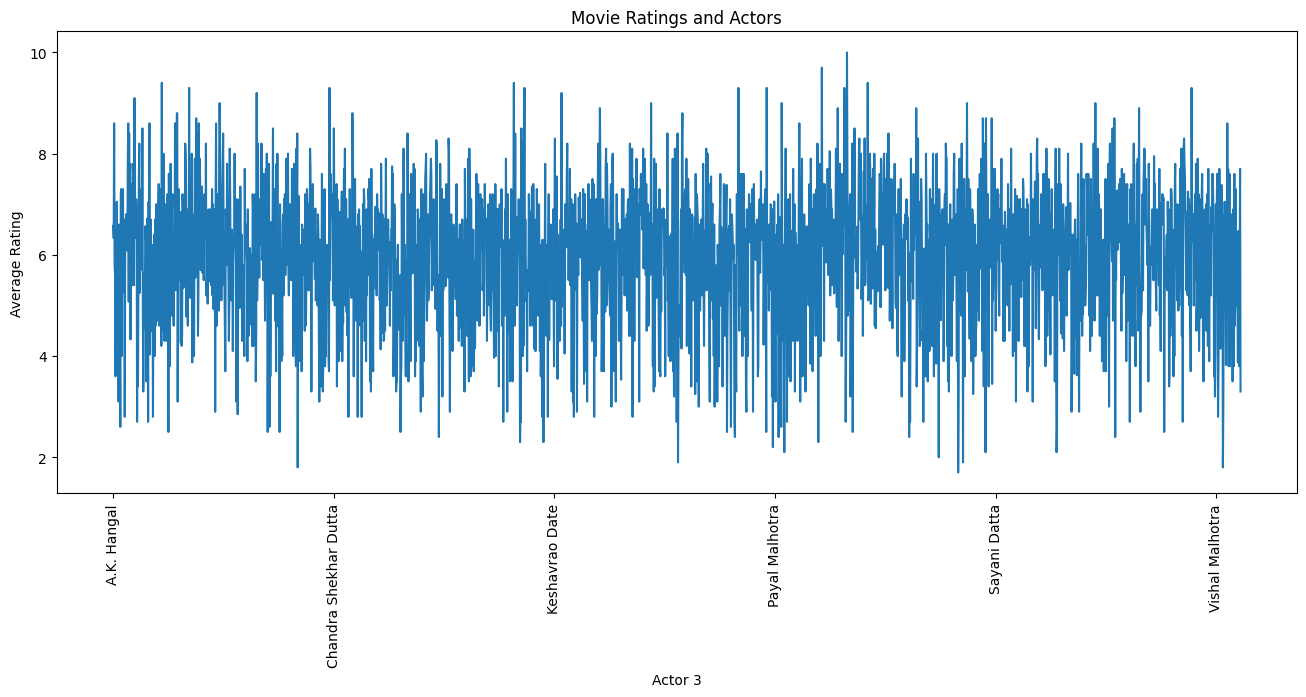

In [155]:
# Actor 3 & Rating

ratings_by_actor = df.groupby('Actor 3')['Rating'].mean()
print(ratings_by_actor)

plt.figure(figsize=(16, 6))
ratings_by_actor.plot()
plt.title('Movie Ratings and Actors')
plt.xlabel('Actor 3')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

**Encoding data & Spliting data**

In [156]:
Le = LabelEncoder()
df['Director_encoded'] = Le.fit_transform(df['Director'])
df['Actor1'] = Le.fit_transform(df['Actor 1'])
df['Actor2'] = Le.fit_transform(df['Actor 2'])
df['Actor3'] = Le.fit_transform(df['Actor 3'])

df['Year'] = df['Year'].str.replace(r'\D', '', regex=True).astype(int)
df['Year'] = df['Year'].astype(int)

X = df[[ 'Year', 'Votes', 'Duration','Director_encoded','Actor1', 'Actor2', 'Actor3']]
y = df['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

**Train Model**

In [157]:
Model1 = RandomForestRegressor()
Model1.fit(X_train,y_train)

RandomForestRegressor()

**Model Testing**

In [162]:
Model1_pred = Model1.predict(X_test)
print(Model1_pred)
print()

[6.192 5.802 4.765 ... 7.388 6.011 5.511]



**Custom testing**

In [163]:
year = int(input("Year : "))
Votes = int(input("Votes : "))
Duration = float(input("Duration : "))
Director = float(input("Director : "))
Actor1 = float(input("Actor 1 : "))
Actor2 = float(input("Actor 2 : "))
Actor3 = float(input("Actor 3 : "))




Input_Data = {'Year': [year], 'Votes': [Votes], 'Duration': [Duration], 'Director_encoded': [Director], 'Actor1': [Actor1], 'Actor2': [Actor2], 'Actor3': [Actor3]}
df = pd.DataFrame(Input_Data)

predicted_rating = Model1.predict(df)

print()
print('Random Forest Regressor Model Performance: ')
print('R2 score: ',r2_score(y_test, Model1_pred))

print("Predicted Rating:", predicted_rating[0])

Year : 2015
Votes : 250
Duration : 120
Director : 9.2
Actor 1 : 8.1
Actor 2 : 9.1
Actor 3 : 9

Random Forest Regressor Model Performance: 
R2 score:  0.2659253618245764
Predicted Rating: 6.125
